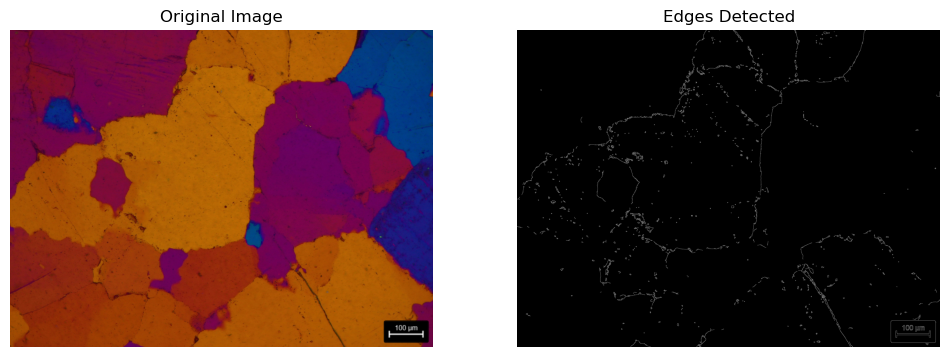

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = "6.jpg"
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray_image, threshold1=50, threshold2=150)

# Display the original image and the edges
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Edges Detected')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.show()


In [4]:
# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to the Lab color space
lab_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2Lab)

# Use k-means clustering to segment the image into different color regions (grains)
num_clusters = 5
reshaped_lab_image = lab_image.reshape((-1, 3))
reshaped_lab_image = np.float32(reshaped_lab_image)

# Define criteria and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(reshaped_lab_image, num_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert back to 8 bit values
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(lab_image.shape)

# Convert the segmented image from Lab to RGB
segmented_image_rgb = cv2.cvtColor(segmented_image, cv2.COLOR_Lab2RGB)

# Display the original image and the segmented image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(segmented_image_rgb)
plt.axis('off')

plt.show()


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


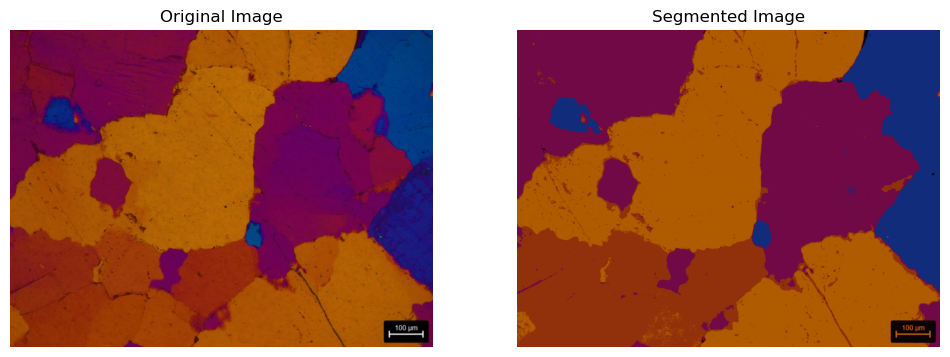

In [5]:
# Reload the image with error handling
image_path = "6.jpg"

# Attempt to load the image
image = cv2.imread(image_path)

# Check if the image is loaded correctly
if image is None:
    raise ValueError(f"Failed to load image from path: {image_path}")

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to the Lab color space
lab_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2Lab)

# Use k-means clustering to segment the image into different color regions (grains)
num_clusters = 5
reshaped_lab_image = lab_image.reshape((-1, 3))
reshaped_lab_image = np.float32(reshaped_lab_image)

# Define criteria and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(reshaped_lab_image, num_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert back to 8 bit values
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(lab_image.shape)

# Convert the segmented image from Lab to RGB
segmented_image_rgb = cv2.cvtColor(segmented_image, cv2.COLOR_Lab2RGB)

# Display the original image and the segmented image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(segmented_image_rgb)
plt.axis('off')

plt.show()


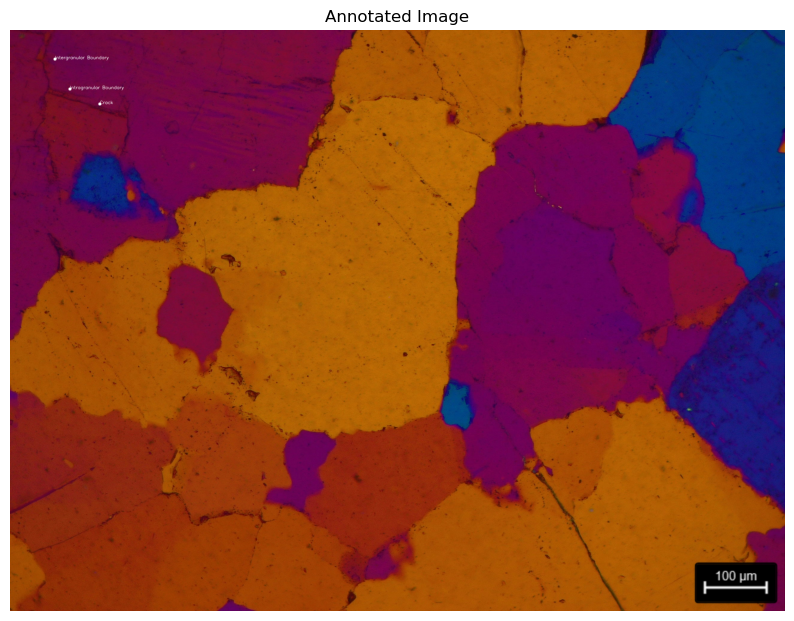

In [6]:
import matplotlib.pyplot as plt

# Function to annotate the image with labels for intergranular boundaries, intragranular boundaries, and cracks
def annotate_image(image, annotations):
    annotated_image = image.copy()
    for (label, (x, y)) in annotations.items():
        cv2.putText(annotated_image, label, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
        cv2.circle(annotated_image, (x, y), 5, (255, 255, 255), -1)
    return annotated_image

# Define some sample points for annotation
annotations = {
    'Intergranular Boundary': (150, 100),
    'Intragranular Boundary': (200, 200),
    'Crack': (300, 250)
}

# Convert the original image to RGB for annotation
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
annotated_image = annotate_image(image_rgb, annotations)

# Display the annotated image
plt.figure(figsize=(10, 10))
plt.imshow(annotated_image)
plt.title('Annotated Image')
plt.axis('off')
plt.show()
